# <center>MAHARASHTRA_DATASET_ANAYSIS  </center>

### Import Necessary Libraries 

In [1]:
#Import Necessary Libraries 
import os
import math
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from IPython.display import HTML, display
from IPython.core import display as ICD
from plotly.offline import init_notebook_mode, iplot
from itertools import groupby
%matplotlib inline
from importlib import reload
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import matplotlib.patches as mpatches 
from matplotlib.collections import PatchCollection

## <center> PRE-PROCESSING </center>

### Load Dataset

In [3]:
PATH = '/home/shri/Desktop/ANALYSIS/rainfall_data_1901_to_2002.xlsx'

In [4]:
India_data = pd.read_excel(PATH)
India_data.head(5)

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,vlookup
0,Andaman & Nicobar Islands,Andaman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andaman & Nicobar IslandsAndaman
1,Andaman & Nicobar Islands,Nicobar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andaman & Nicobar IslandsNicobar
2,Andhra Pradesh,Adilabad,1901.0,6.725,10.488,23.288,35.560,23.119,115.546,294.119,276.865,181.615,47.310,1.339,0.000,Andhra PradeshAdilabad
3,Andhra Pradesh,Adilabad,1902.0,0.420,0.000,0.388,6.070,3.331,45.960,233.973,167.971,198.177,26.447,35.083,11.222,Andhra PradeshAdilabad
4,Andhra Pradesh,Adilabad,1903.0,6.643,1.956,0.173,4.551,33.348,132.078,436.611,334.544,226.037,138.818,14.095,8.823,Andhra PradeshAdilabad


### Missing Values

State         0
District      0
Year         35
Jan          35
Feb          35
Mar          35
Apr          35
May          35
Jun          35
Jul          35
Aug          35
Sep          35
Oct          35
Nov          35
Dec          35
vlookup     102
dtype: int64


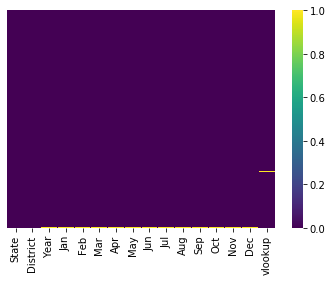

In [5]:

missing_value=India_data.isnull().sum()
print(missing_value)

#Visualization of missing value
import seaborn as sns
sns.heatmap(India_data.isnull(), yticklabels=False, cmap='viridis')

### Eliminate unnessary column

In [6]:
India_data = India_data.drop(columns='vlookup')

#Drop The Missing Value Rows
India_data = India_data[India_data['Year'].notnull()]
India_data['Year'] = India_data.Year.astype('int')
India_data.index = range(len(India_data))
India_data.head()

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Andhra Pradesh,Adilabad,1901,6.725,10.488,23.288,35.560,23.119,115.546,294.119,276.865,181.615,47.310,1.339,0.000
1,Andhra Pradesh,Adilabad,1902,0.420,0.000,0.388,6.070,3.331,45.960,233.973,167.971,198.177,26.447,35.083,11.222
2,Andhra Pradesh,Adilabad,1903,6.643,1.956,0.173,4.551,33.348,132.078,436.611,334.544,226.037,138.818,14.095,8.823
3,Andhra Pradesh,Adilabad,1904,0.054,0.121,11.446,0.017,16.900,131.048,160.694,81.865,251.577,110.391,0.146,0.130
4,Andhra Pradesh,Adilabad,1905,0.589,2.293,8.252,35.020,17.569,79.937,96.331,313.522,361.697,4.950,0.146,0.000


In [7]:
maha_data = India_data[India_data['State'] == 'Maharashtra']
maha_data = maha_data.drop(columns='State')
maha_data.head(5)

,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
26826,Ahmadnagar,1901,2.510,11.489,11.325,33.931,30.401,262.971,162.397,120.152,58.708,62.633,0.596,0.000
26827,Ahmadnagar,1902,0.603,0.000,0.003,1.340,6.338,90.293,223.483,101.852,297.212,61.453,41.992,26.715
26828,Ahmadnagar,1903,0.227,0.000,0.000,2.602,69.076,182.652,500.983,156.236,164.433,88.419,2.022,3.999
26829,Ahmadnagar,1904,0.937,1.126,1.051,2.378,4.365,120.658,117.058,38.470,225.726,72.389,0.271,0.000
26830,Ahmadnagar,1905,0.000,0.622,0.000,0.452,4.115,114.385,197.696,116.061,54.338,66.508,6.581,0.000


In [8]:
districts = maha_data.District.unique()
years = list(range(1901, 2003))
months = India_data.columns[3:]
year_month = [str(year) + '_' + month for year in years for month in months]
dates = pd.date_range(start='1901-01', freq='MS', periods=len(years)*12)

In [9]:
maharashtra_data = pd.DataFrame({'Year_Month': year_month})
maharashtra_data['Date'] = dates
maharashtra_data[['Year', 'Month']] = maharashtra_data['Year_Month'].str.split('_', n=1, expand=True)
maharashtra_data = maharashtra_data.drop(columns=['Year_Month'])
for district in districts:
    df = maha_data[maha_data.District == district].drop(columns=['District', 'Year'])
    df = df.as_matrix().reshape((len(years) * len(months), 1))[:,0]
    maharashtra_data[district] = df

#maharashtra_data = maharashtra_data.rename(columns={'Bid': 'Beed'})
maharashtra_data.head()

,Date,Year,Month,Ahmadnagar,Akola,Amravati,Aurangabad,Bhandara,Bid,Buldana,...,Nashik,Osmanabad,Parbhani,Pune,Sangli,Satara,Solapur,Wardha,Washim,Yavatmal
0,1901-01-01,1901,Jan,2.510,34.202,35.651,10.922,23.397,16.647,31.455,...,5.063,15.500,33.207,0.922,0.138,0.197,4.496,45.050,32.485,22.031
1,1901-02-01,1901,Feb,11.489,1.099,6.822,4.362,63.844,1.916,0.823,...,1.609,2.784,4.997,7.195,0.537,0.525,3.667,28.220,3.607,16.198
2,1901-03-01,1901,Mar,11.325,30.002,36.103,25.161,33.563,27.287,28.448,...,11.196,11.333,31.625,5.105,13.090,9.566,10.330,26.398,26.557,29.318
3,1901-04-01,1901,Apr,33.931,10.248,10.636,12.714,61.560,33.211,13.902,...,7.838,34.814,41.941,35.949,50.077,30.110,59.854,29.228,18.127,30.521
4,1901-05-01,1901,May,30.401,2.891,4.173,34.244,13.665,59.027,9.397,...,7.475,52.792,31.794,36.650,78.994,65.226,50.892,8.619,6.700,13.193


## <center>DESCRIPTIVE ANALYSIS</center>

In [10]:
maharashtra_data.describe()

,Ahmadnagar,Akola,Amravati,Aurangabad,Bhandara,Bid,Buldana,Chandrapur,Dhule,Garhchiroli,...,Nashik,Osmanabad,Parbhani,Pune,Sangli,Satara,Solapur,Wardha,Washim,Yavatmal
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.00000,1224.000000,...,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.00000,1224.000000,1224.000000
mean,70.725002,69.280060,72.835006,56.314584,103.724068,59.723958,66.204706,92.069997,92.71105,90.792671,...,106.699367,58.449961,66.320551,116.614967,108.410398,145.761729,60.111949,87.07134,71.693853,81.156947
std,96.668650,92.395694,99.475813,75.706685,144.630734,77.785514,87.295256,123.950443,142.50739,116.482177,...,162.239188,73.338064,86.952474,172.885480,145.100055,214.881423,72.427313,120.09457,95.867829,109.683886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.015500,1.186750,1.733500,0.830500,2.867000,1.555500,1.426000,2.792500,0.28500,3.726750,...,0.301500,2.307250,1.573000,0.694750,1.104500,0.478000,2.072500,2.07100,1.465500,2.537750
50%,18.363000,15.107500,16.351000,13.777500,23.442500,20.152000,16.373000,22.055500,9.94800,24.175500,...,9.331500,22.760000,20.945000,21.300500,35.433000,26.835000,27.122000,21.09050,18.357500,21.123000
75%,120.748000,128.698500,129.808250,98.326000,175.777000,100.252000,121.057250,160.598500,147.63650,170.250500,...,183.579000,95.900250,108.881500,193.617750,176.114750,233.222750,102.279500,146.03725,132.369500,139.657750
max,611.131000,413.044000,526.661000,471.683000,724.601000,449.469000,435.508000,608.120000,697.78900,551.423000,...,820.082000,400.792000,475.092000,953.574000,812.328000,1157.727000,383.999000,607.16600,473.271000,471.159000


### Histogram Plotting




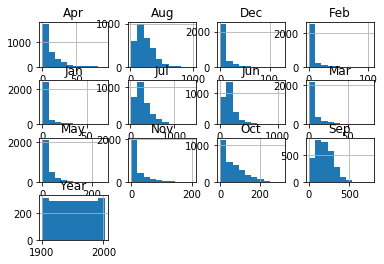

In [11]:
maha_data.hist()
plt.show()

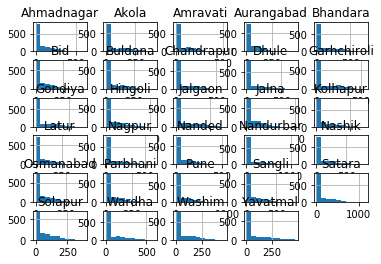

In [12]:
maharashtra_data.hist()
plt.show()

## <center>CORRLATED DISTRICTS</center>

In [13]:
maharashtra_data.corr()

,Ahmadnagar,Akola,Amravati,Aurangabad,Bhandara,Bid,Buldana,Chandrapur,Dhule,Garhchiroli,...,Nashik,Osmanabad,Parbhani,Pune,Sangli,Satara,Solapur,Wardha,Washim,Yavatmal
Ahmadnagar,1.000000,0.824698,0.793052,0.889327,0.758399,0.902863,0.842147,0.780130,0.842764,0.790887,...,0.912207,0.875623,0.851111,0.920973,0.849835,0.845255,0.912013,0.787155,0.838476,0.822339
Akola,0.824698,1.000000,0.969082,0.869377,0.861806,0.820925,0.974733,0.882892,0.888001,0.877862,...,0.868478,0.761157,0.866351,0.800133,0.795308,0.793925,0.764355,0.916496,0.979383,0.930356
Amravati,0.793052,0.969082,1.000000,0.794547,0.901362,0.758580,0.908230,0.909206,0.878454,0.894966,...,0.866737,0.703249,0.809670,0.797080,0.806647,0.803772,0.731607,0.957121,0.932879,0.934596
Aurangabad,0.889327,0.869377,0.794547,1.000000,0.707895,0.946927,0.925277,0.755875,0.864535,0.765814,...,0.834692,0.896020,0.915465,0.773048,0.718482,0.717312,0.845538,0.768725,0.897634,0.833415
Bhandara,0.758399,0.861806,0.901362,0.707895,1.000000,0.701374,0.814657,0.964535,0.837997,0.955253,...,0.848629,0.666943,0.759993,0.783216,0.808744,0.797153,0.711730,0.951397,0.850052,0.908592
Bid,0.902863,0.820925,0.758580,0.946927,0.701374,1.000000,0.872443,0.756342,0.780188,0.769857,...,0.790694,0.973222,0.955831,0.770564,0.729953,0.709061,0.909390,0.753860,0.868940,0.833535
Buldana,0.842147,0.974733,0.908230,0.925277,0.814657,0.872443,1.000000,0.847751,0.878591,0.848884,...,0.852190,0.812280,0.905095,0.786251,0.764251,0.764340,0.788480,0.868461,0.967908,0.905467
Chandrapur,0.780130,0.882892,0.909206,0.755875,0.964535,0.756342,0.847751,1.000000,0.851618,0.988574,...,0.854257,0.727002,0.815019,0.789679,0.817039,0.802049,0.756778,0.958486,0.884134,0.950649
Dhule,0.842764,0.888001,0.878454,0.864535,0.837997,0.780188,0.878591,0.851618,1.000000,0.847684,...,0.946968,0.739868,0.802150,0.846079,0.825872,0.830915,0.775631,0.859349,0.876440,0.867170
Garhchiroli,0.790887,0.877862,0.894966,0.765814,0.955253,0.769857,0.848884,0.988574,0.847684,1.000000,...,0.855927,0.745396,0.823067,0.797014,0.825072,0.809103,0.770958,0.934746,0.880611,0.935660


### Correlation Plot

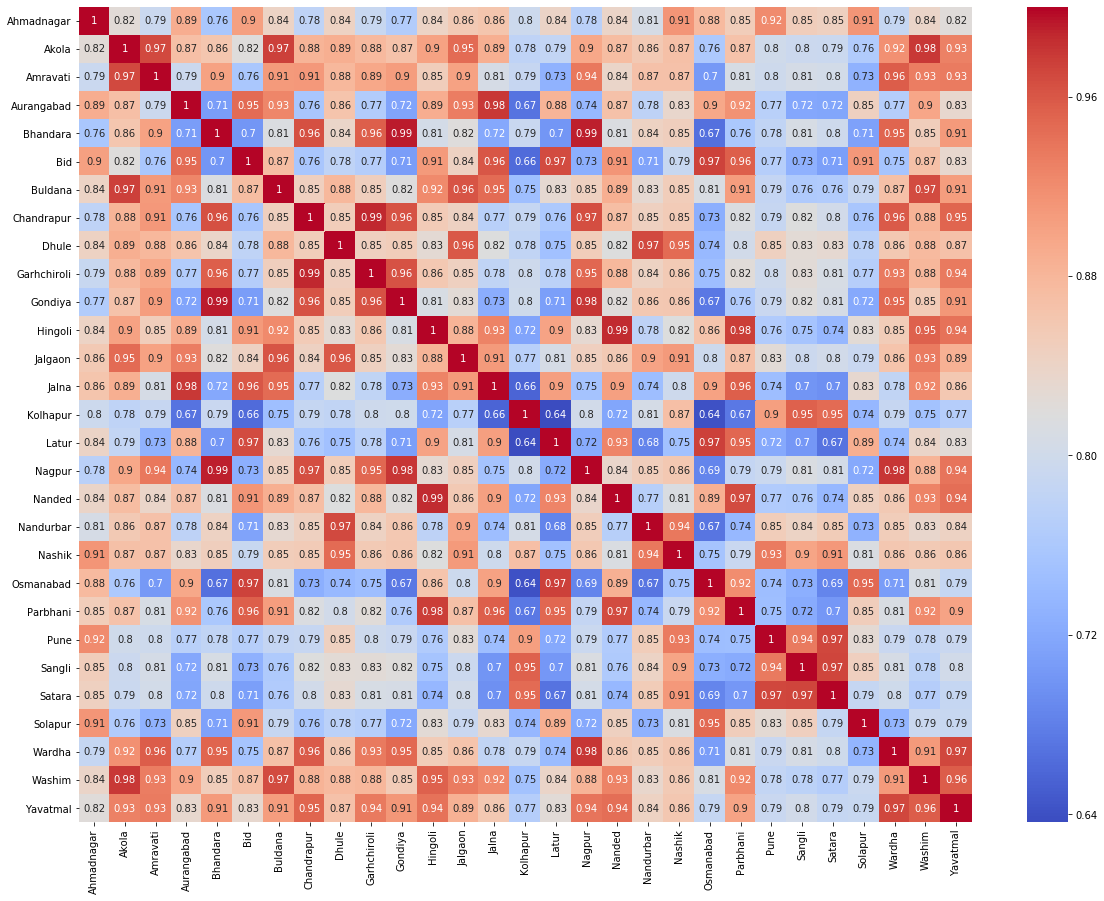

In [14]:
corr_matrix = maharashtra_data.drop(columns=['Year', 'Month']).corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### Highly correlated districts

In [15]:
def return_highly_correlated(corr_matrix, corr_coef):
    district_corr = corr_matrix.abs().unstack().sort_values().drop_duplicates()
    tuples = district_corr[(district_corr > corr_coef) & (district_corr != 1.0)]
    levels = tuples.index.levels[0]
    labels = tuples.index.labels

    high_corr_districts = []
    for i in range(len(labels[0])):
        high_corr_districts.append([levels[labels[0][i]], levels[labels[1][i]], tuples[i]])
    high_corr_districts = np.array(high_corr_districts)
    df = pd.DataFrame({'District1': high_corr_districts[:, 0], 
                      'District2': high_corr_districts[:, 1],
                      'Correlation_coefficient': high_corr_districts[:, 2]},
                     columns = ['District1', 'District2', 'Correlation_coefficient'])
    return df

In [16]:
high_corr_districts = return_highly_correlated(corr_matrix, 0.98)
high_corr_districts

,District1,District2,Correlation_coefficient
0,Nagpur,Gondiya,0.9805330709528167
1,Nagpur,Wardha,0.9811563634226902
2,Nanded,Hingoli,0.9858166679818119
3,Chandrapur,Garhchiroli,0.9885737788804028
4,Nagpur,Bhandara,0.9907760645844106
5,Bhandara,Gondiya,0.9922307205938624


## <center> Data Visualization </center>

### Highly correlated districts - Map

In [17]:
correlated_districts = [['Nagpur', 'Gondiya', 'Wardha', 'Bhandara'], ['Nanded', 'Hingoli'], ['Chandrapur', 'Garhchiroli']]
correlated_districts_dict = {}
bin_num = 0
for l in correlated_districts:
    for dist in l:
        correlated_districts_dict[dist]=bin_num
    bin_num+=1

latlon_data = pd.read_csv("/home/shri/Downloads/PROJECT/Time-Series-Forecasting-master/Maharashtra/district_latlon.csv") 
latlon_data = latlon_data.drop(latlon_data.columns[latlon_data.columns.str.contains('unnamed',case = False)],axis = 1)


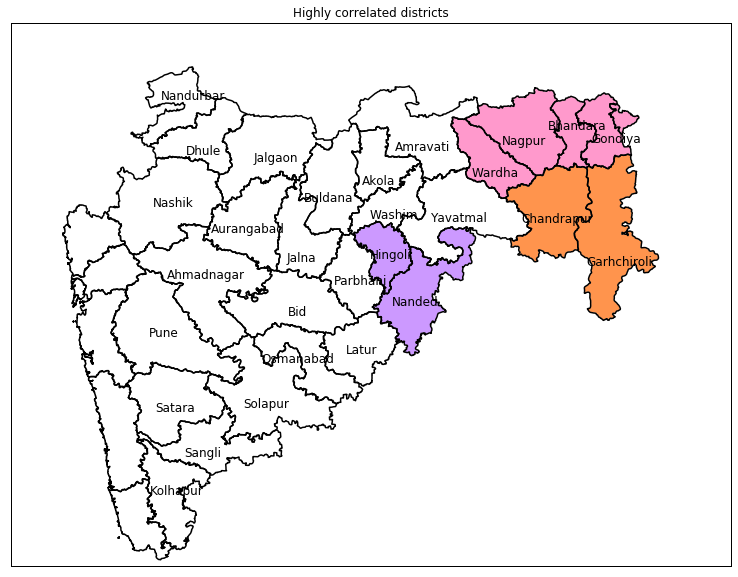

In [18]:
num_colors = len(correlated_districts)
cm = plt.get_cmap('rainbow')
correlated_districts_df = pd.DataFrame({'Method': list(correlated_districts_dict.values())})
correlated_districts_df.index = correlated_districts_dict.keys()
correlated_districts_df['bin'] = correlated_districts_dict.values()
scheme = ['#ff99cc', '#cc99ff', '#ff944d']
# scheme = [cm(i / num_colors) for i in range(num_colors)]
values = correlated_districts_df.bin
#bins = np.linspace(values.min(), values.max(), num_colors)

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, frame_on=False)

map = Basemap(projection='lcc',resolution='l', llcrnrlon=72, 
               llcrnrlat=15.5,urcrnrlon=82,urcrnrlat=22.5,lat_0=16,lon_0=75.11)
map.drawmapboundary(fill_color='white')
map.fillcontinents(color='white',lake_color='white')
map.readshapefile('/home/shri/Desktop/ANALYSIS/gadm36_IND_shp/gadm36_IND_2', 'gadm36_IND_2', drawbounds = False)

patches   = []
facecolor_array = []
for info, shape in zip(map.gadm36_IND_2_info, map.gadm36_IND_2):
    if(info['NAME_1'] == 'Maharashtra'):
        x, y = zip(*shape) 
        map.plot(x, y, marker='', color='black')
        district = info['NAME_2']
        if district not in correlated_districts_df.index:
            color = '#dddddd'
        else:
            color = scheme[correlated_districts_df.ix[district]['bin']]
            patches.append( Polygon(np.array(shape), True))
            facecolor_array.append(color)
    else:
        color = '#dddddd'

ax.add_collection(PatchCollection(patches, facecolor= facecolor_array, edgecolor='w', linewidths=1., zorder=2))
ax.set_title("Highly correlated districts")

lat = latlon_data['lat'].tolist()
lon = latlon_data['lon'].tolist()
label_dist = latlon_data['district'].tolist()

X,Y = map(lon,lat)
ax.scatter(X,Y)
for i, (x, y) in enumerate(zip(X, Y), start=0):
    district_name = label_dist[i]
    ax.annotate(district_name, (x,y), xytext=(0,0), textcoords='offset points',fontsize=12,color='black')
plt.show()

###  Outlier Finding 

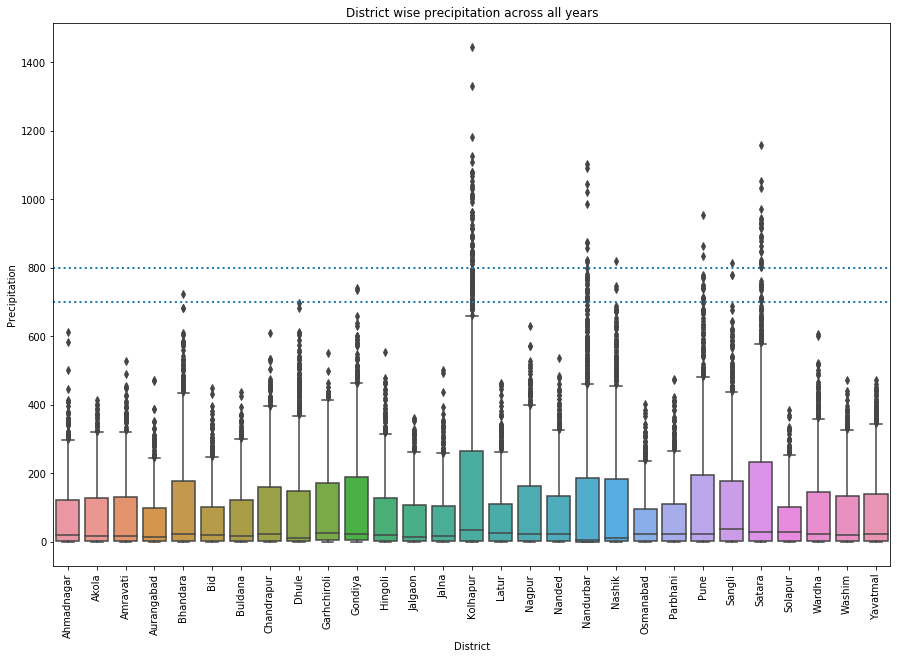

In [19]:
matrix = maharashtra_data.drop(columns=['Date', 'Year', 'Month'])
plt.figure(figsize=(15,10))
g = sns.boxplot(x="variable", y="value", data=pd.melt(matrix))
labels = g.get_xticklabels()
g.set_xticklabels(labels, rotation=90)
g.set_xlabel('District')
g.set_ylabel('Precipitation')
g.set_title('District wise precipitation across all years')
plt.axhline(y=700, linewidth=2, linestyle='dotted')
plt.axhline(y=800, linewidth=2, linestyle='dotted')

### Rainfall of Beed District :

Text(0.5, 1.0, 'Rainfall of Beed district')

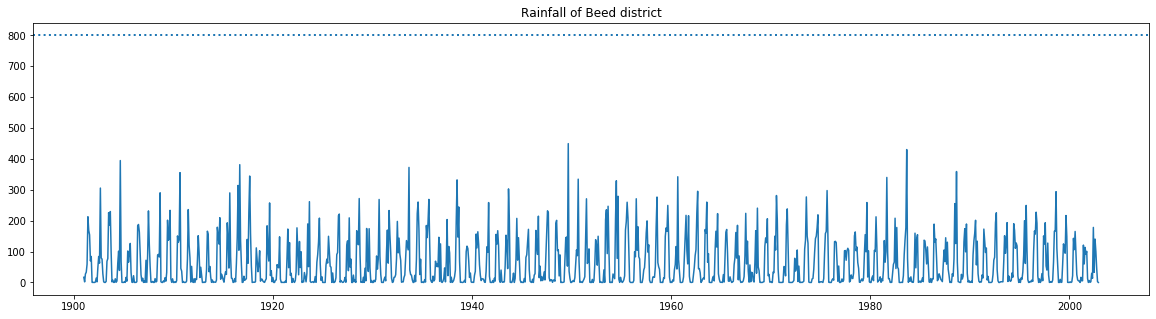

In [20]:
plt.figure(figsize=(20,5))
plt.plot(maharashtra_data.Date, maharashtra_data.Bid)
plt.axhline(y=800, linewidth=2, linestyle='dotted')
plt.title('Rainfall of Beed district')

In [21]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Plot the districts with heavy rainfall over all years(>700|800mm)

In [22]:
high_rainfall = {}
high_rainfall_months = {}
districts = maharashtra_data.columns[3:]
for district in districts:
    count = len(maharashtra_data[maharashtra_data[district]>=800])
    if count != 0:
        high_rainfall[district] = count
        high_rainfall_months[district] = list(maharashtra_data[maharashtra_data[district]>=800].Month)
        
for district in high_rainfall_months:
    print(color.RED + "District Name: "+ color.END,district)
    counts = [(i, len(list(c))) for i,c in groupby(sorted(high_rainfall_months[district]))] 
    print(color.DARKCYAN + "Count for months: " + color.END,counts)
high_rainfall

District Name:  Kolhapur
Count for months:  [('Aug', 5), ('Jul', 27), ('Jun', 17)]
District Name:  Nandurbar
Count for months:  [('Jul', 10)]
District Name:  Nashik
Count for months:  [('Jul', 1)]
District Name:  Pune
Count for months:  [('Jul', 2), ('Jun', 1)]
District Name:  Sangli
Count for months:  [('Jul', 1)]
District Name:  Satara
Count for months:  [('Jul', 20), ('Jun', 5)]


{'Kolhapur': 49,
 'Nandurbar': 10,
 'Nashik': 1,
 'Pune': 3,
 'Sangli': 1,
 'Satara': 25}

## <center> MAHARASHTRA RAINFALL </center>

### Yearly rainfall 

In [23]:
m_data_copy = maharashtra_data.copy()
m_data_copy = m_data_copy.drop(columns=['Date', 'Year', 'Month'])
m_data_copy = m_data_copy.groupby(np.arange(len(df))//12).mean()
columns = m_data_copy.columns
columns = columns.insert(0, 'Year')
m_data_copy['Year'] = maharashtra_data.Year.unique()
m_data_copy = m_data_copy.reindex(columns=columns)
m_data_copy.set_index('Year', inplace=True)

In [24]:
m_data_copy.head()

,Ahmadnagar,Akola,Amravati,Aurangabad,Bhandara,Bid,Buldana,Chandrapur,Dhule,Garhchiroli,...,Nashik,Osmanabad,Parbhani,Pune,Sangli,Satara,Solapur,Wardha,Washim,Yavatmal
Year,,,,,,,,,,,,,,,,,,,,,
1901,63.092750,77.823333,73.880833,62.966417,89.942500,68.990750,82.473833,92.038500,65.832667,82.867167,...,82.748167,56.653750,72.188500,111.361167,93.724583,131.658083,55.418750,85.357167,76.065333,82.455833
1902,70.940333,59.357500,61.660417,57.995167,67.120917,58.366167,56.106333,63.641167,93.626833,64.669333,...,108.657333,54.276250,59.543417,105.194917,93.180500,127.642583,52.421833,67.705750,62.795333,64.140083
1903,97.554083,78.115750,78.562250,65.851333,131.699667,74.999000,75.238000,112.471250,121.145583,113.153167,...,125.389917,87.275417,86.754917,127.237417,116.895250,130.759500,85.031583,97.724917,89.132250,101.637750
1904,48.702417,58.301917,48.570083,60.179417,77.639417,57.015417,64.512667,66.476000,65.572833,71.484583,...,77.788500,50.810000,60.305917,59.527833,69.020917,80.311583,43.898083,59.393333,65.820500,61.974667
1905,46.729833,56.520417,66.528167,37.807083,115.219833,36.920667,54.126833,93.275583,66.059417,95.537417,...,74.322667,38.655583,45.336000,95.595917,69.095750,111.762833,37.047167,83.216500,54.317333,69.244500


### Monthly rainfall 

In [25]:
m_data_copy = maha_data.copy()
m_data_copy['Jan-Feb'] = m_data_copy['Jan'] + m_data_copy['Feb']
m_data_copy['Mar-May'] = m_data_copy['Mar'] + m_data_copy['Apr'] + m_data_copy['May']
m_data_copy['Jun-Sep'] = m_data_copy['Jun'] + m_data_copy['Jul'] + m_data_copy['Aug'] + m_data_copy['Sep']
m_data_copy['Oct-Dec'] = m_data_copy['Oct'] + m_data_copy['Nov'] + m_data_copy['Dec']
m_data_copy['Annual'] = m_data_copy['Jan-Feb'] + m_data_copy['Mar-May'] + m_data_copy['Jun-Sep'] + m_data_copy['Oct-Dec']
m_data_copy.head()

,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Annual
26826,Ahmadnagar,1901,2.510,11.489,11.325,33.931,30.401,262.971,162.397,120.152,58.708,62.633,0.596,0.000,13.999,75.657,604.228,63.229,757.113
26827,Ahmadnagar,1902,0.603,0.000,0.003,1.340,6.338,90.293,223.483,101.852,297.212,61.453,41.992,26.715,0.603,7.681,712.840,130.160,851.284
26828,Ahmadnagar,1903,0.227,0.000,0.000,2.602,69.076,182.652,500.983,156.236,164.433,88.419,2.022,3.999,0.227,71.678,1004.304,94.440,1170.649
26829,Ahmadnagar,1904,0.937,1.126,1.051,2.378,4.365,120.658,117.058,38.470,225.726,72.389,0.271,0.000,2.063,7.794,501.912,72.660,584.429
26830,Ahmadnagar,1905,0.000,0.622,0.000,0.452,4.115,114.385,197.696,116.061,54.338,66.508,6.581,0.000,0.622,4.567,482.480,73.089,560.758


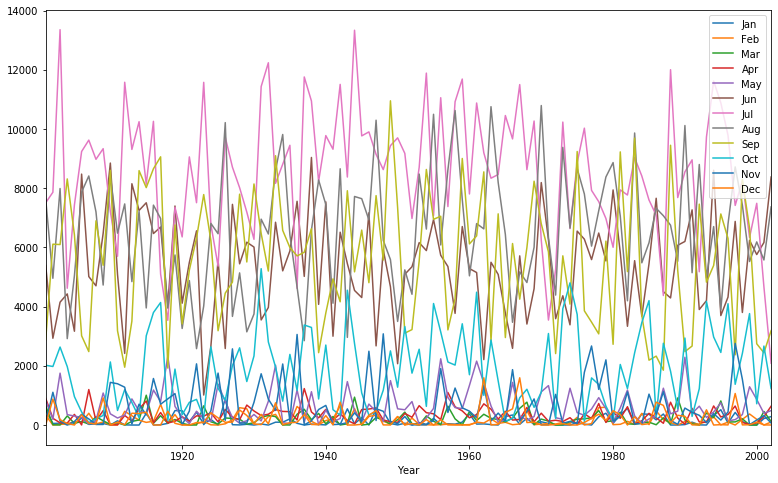

In [26]:
months = list(maha_data.columns[1:])
m_data_copy[months].groupby("Year").sum().plot(figsize=(13,8))

### Seasonal Rainfall

In [27]:
seasonal_data = m_data_copy[['Year','Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].groupby("Year").sum()

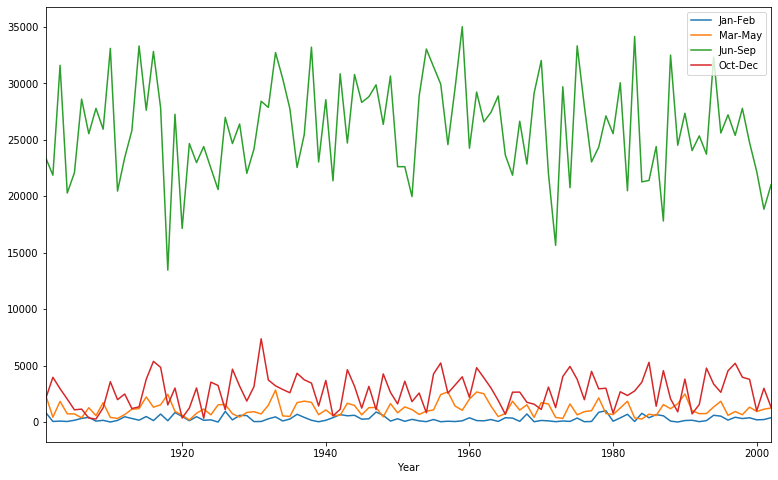

In [28]:
seasonal_data.plot(figsize=(13,8))

### Annual rainfall in Maharshtra


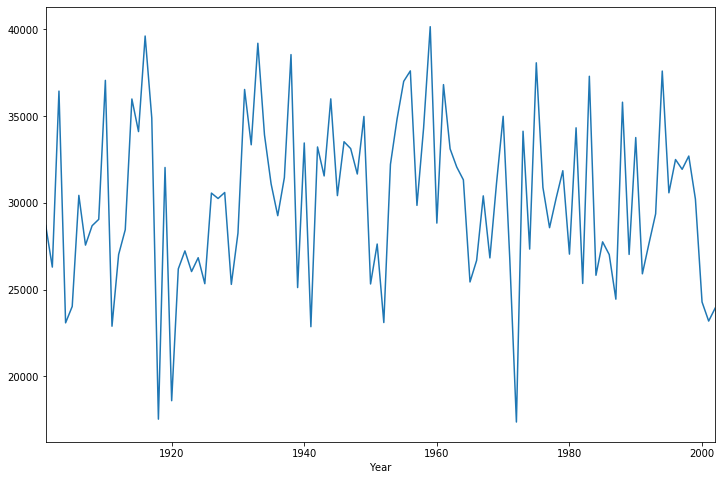

In [29]:
Annual_rainfall = m_data_copy.groupby('Year').sum()['Annual']
Annual_rainfall.plot(figsize=(12,8))

### District wise Seasonal rainfall across all years

In [30]:
seasonal_district_data = m_data_copy[['District','Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].groupby("District").sum()
seasonal_district_data.head()

,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
District,,,,
Ahmadnagar,249.735,4052.170,72472.375,9793.123
Akola,1396.348,2430.082,71598.467,9373.896
Amravati,1570.125,2631.008,76188.207,8760.707
Aurangabad,374.951,3030.083,56120.789,9403.228
Bhandara,3109.308,4954.334,111808.461,7086.156


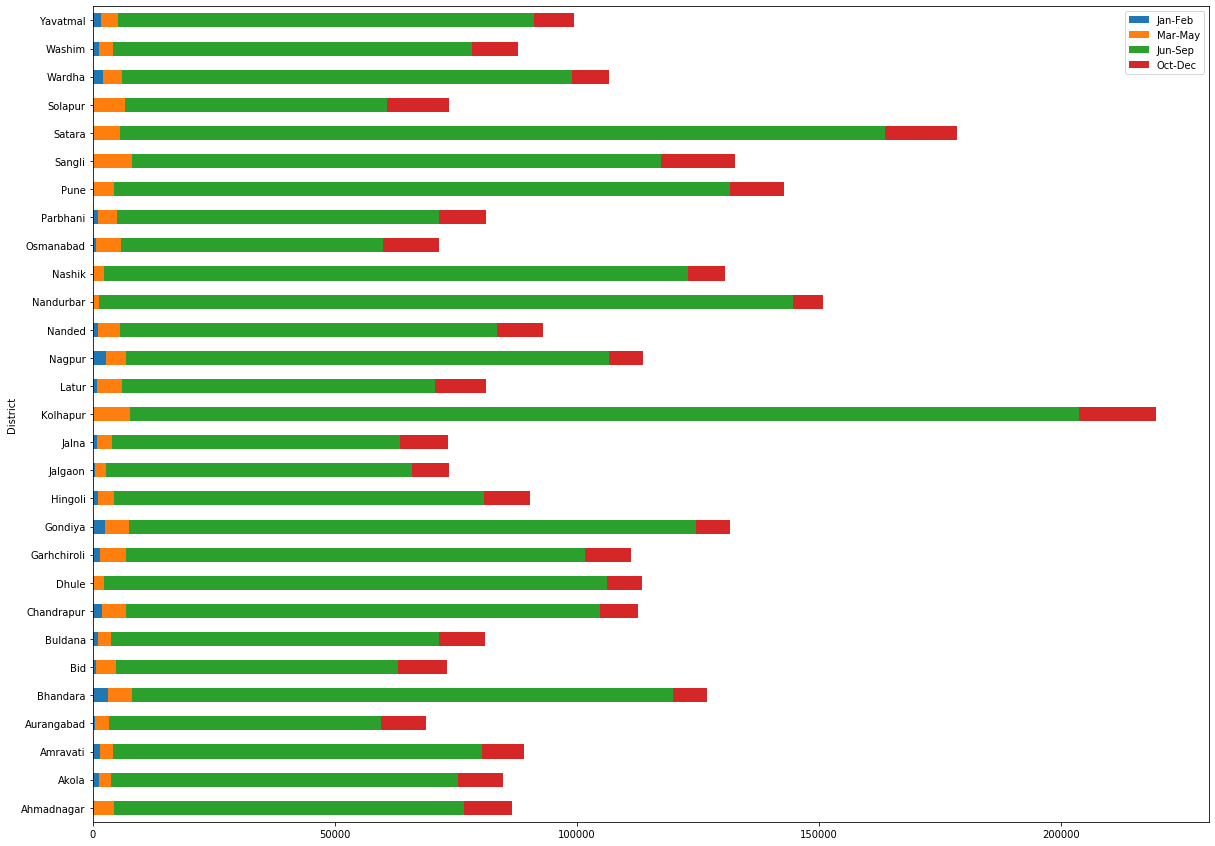

In [31]:
seasonal_district_data.plot.barh(stacked=True,figsize=(20,15));

### District wise Monthly mean precipitation across all years

In [32]:
columns = list(m_data_copy.columns[2:])
columns.insert(0,m_data_copy.columns[0])
monthly_mean_data = m_data_copy[columns].groupby("District").sum()
monthly_mean_data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Annual
District,,,,,,,,,,,,,,,,,
Ahmadnagar,78.006,171.729,256.647,1109.044,2686.479,16877.414,23771.109,14935.436,16888.416,6820.429,2419.147,553.547,249.735,4052.170,72472.375,9793.123,86567.403
Akola,846.253,550.095,837.986,538.873,1053.223,14974.147,22112.462,18723.158,15788.700,5962.797,2420.409,990.690,1396.348,2430.082,71598.467,9373.896,84798.793
Amravati,929.664,640.461,1131.693,575.061,924.254,14834.273,25561.345,20946.533,14846.056,5463.461,2313.593,983.653,1570.125,2631.008,76188.207,8760.707,89150.047
Aurangabad,235.425,139.526,333.881,627.979,2068.223,11409.454,15241.871,10719.013,18750.451,5451.250,3068.053,883.925,374.951,3030.083,56120.789,9403.228,68929.051
Bhandara,1105.281,2004.027,1558.051,1794.416,1601.867,18865.044,38140.454,34557.667,20245.296,5127.286,1009.919,948.951,3109.308,4954.334,111808.461,7086.156,126958.259


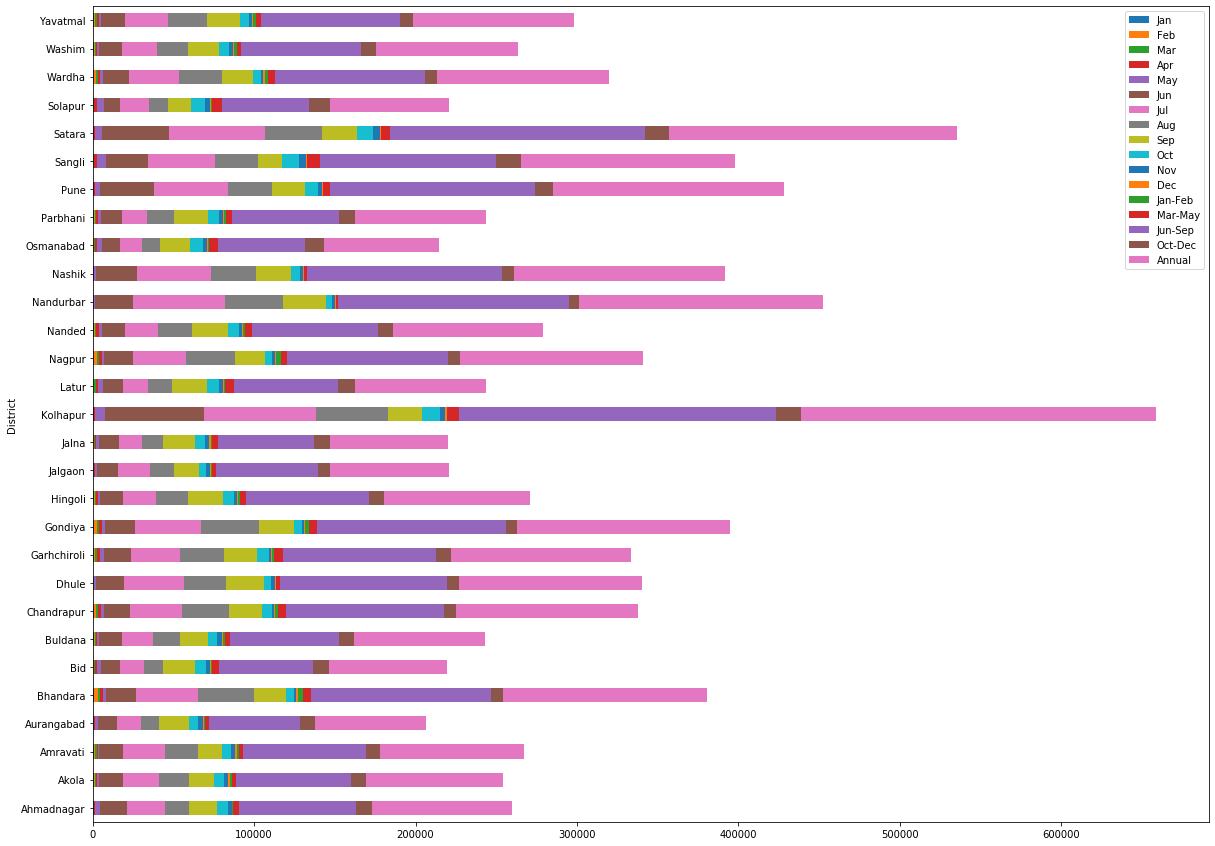

In [33]:
monthly_mean_data.plot.barh(stacked=True,figsize=(20,15));

### MARATHWADA AREAL STRUCTURE

In [34]:
correlated_districts=maharashtra_data[maharashtra_data.columns[1:]].corr()['Bid'][:-1]
correlated_districts
relevant_features = correlated_districts[correlated_districts>0.90]
relevant_features

Ahmadnagar    0.902863
Aurangabad    0.946927
Bid           1.000000
Hingoli       0.908995
Jalna         0.960458
Latur         0.967468
Nanded        0.912879
Osmanabad     0.973222
Parbhani      0.955831
Solapur       0.909390
Name: Bid, dtype: float64

In [35]:
correlated_districts = [['Aurangabad','Bid','Hingoli','Nanded','Jalna','Parbhani', 'Latur', 'Osmanabad']]
correlated_districts_dict = {}

In [36]:
bin_num = 0
for l in correlated_districts:
    for dist in l:
        correlated_districts_dict[dist]=bin_num
    bin_num+=1
    
latlon_data = pd.read_csv("/home/shri/Desktop/ANALYSIS/district_latlon.csv") 
latlon_data = latlon_data.drop(latlon_data.columns[latlon_data.columns.str.contains('unnamed',case = False)],axis = 1)


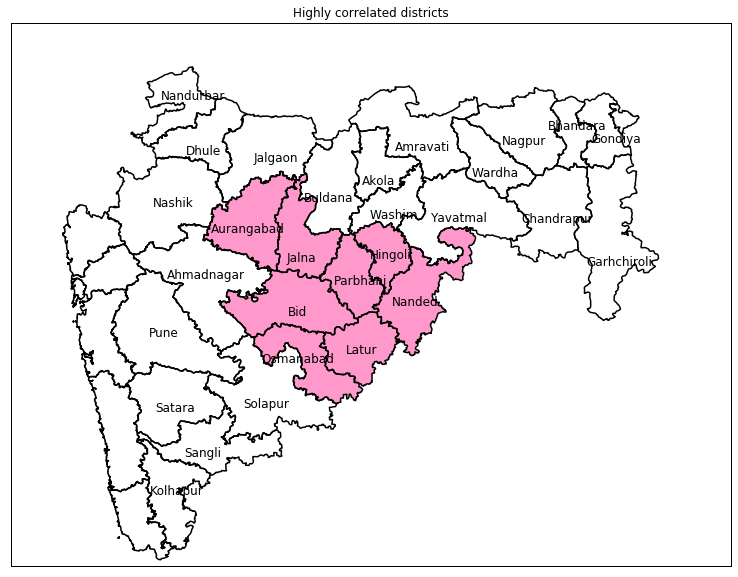

In [37]:
num_colors = len(correlated_districts)
cm = plt.get_cmap('rainbow')
correlated_districts_df = pd.DataFrame({'Method': list(correlated_districts_dict.values())})
correlated_districts_df.index = correlated_districts_dict.keys()
correlated_districts_df['bin'] = correlated_districts_dict.values()
scheme = ['#ff99cc', '#cc99ff', '#ff944d']
# scheme = [cm(i / num_colors) for i in range(num_colors)]
values = correlated_districts_df.bin
#bins = np.linspace(values.min(), values.max(), num_colors)

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, frame_on=False)

map = Basemap(projection='lcc',resolution='l', llcrnrlon=72, 
               llcrnrlat=15.5,urcrnrlon=82,urcrnrlat=22.5,lat_0=16,lon_0=75.11)
map.drawmapboundary(fill_color='white')
map.fillcontinents(color='white',lake_color='white')
map.readshapefile('/home/shri/Desktop/ANALYSIS/gadm36_IND_shp/gadm36_IND_2', 'gadm36_IND_2', drawbounds = False)

patches   = []
facecolor_array = []
for info, shape in zip(map.gadm36_IND_2_info, map.gadm36_IND_2):
    if(info['NAME_1'] == 'Maharashtra'):
        x, y = zip(*shape) 
        map.plot(x, y, marker='', color='black')
        district = info['NAME_2']
        if district not in correlated_districts_df.index:
            color = '#dddddd'
        else:
            color = scheme[correlated_districts_df.ix[district]['bin']]
            patches.append( Polygon(np.array(shape), True))
            facecolor_array.append(color)
    else:
        color = '#dddddd'

ax.add_collection(PatchCollection(patches, facecolor= facecolor_array, edgecolor='w', linewidths=1., zorder=2))
ax.set_title("Highly correlated districts")

lat = latlon_data['lat'].tolist()
lon = latlon_data['lon'].tolist()
label_dist = latlon_data['district'].tolist()

X,Y = map(lon,lat)
ax.scatter(X,Y)
for i, (x, y) in enumerate(zip(X, Y), start=0):
    district_name = label_dist[i]
    ax.annotate(district_name, (x,y), xytext=(0,0), textcoords='offset points',fontsize=12,color='black')
plt.show()

## Plot the districts with heavy rainfall over all years(>700|800mm)

In [38]:
high_rainfall = {}
high_rainfall_months = {}
districts = maharashtra_data.columns[3:]
for district in districts:
    count = len(maharashtra_data[maharashtra_data[district]>=800])
    if count != 0:
#         print(district)
#         print(maharashtra_data[maharashtra_data[district]>=800].head(40))
        high_rainfall[district] = count
        high_rainfall_months[district] = list(maharashtra_data[maharashtra_data[district]>=800].Month)
        
for district in high_rainfall_months:
    print(district)
    counts = [(i, len(list(c))) for i,c in groupby(sorted(high_rainfall_months[district]))] 
    print(counts)
high_rainfall

Kolhapur
[('Aug', 5), ('Jul', 27), ('Jun', 17)]
Nandurbar
[('Jul', 10)]
Nashik
[('Jul', 1)]
Pune
[('Jul', 2), ('Jun', 1)]
Sangli
[('Jul', 1)]
Satara
[('Jul', 20), ('Jun', 5)]


{'Kolhapur': 49,
 'Nandurbar': 10,
 'Nashik': 1,
 'Pune': 3,
 'Sangli': 1,
 'Satara': 25}

           Count  bin
Kolhapur      49    0
Nandurbar     10    0
Nashik         1    0
Pune           3    0
Sangli         1    0
Satara        25    0


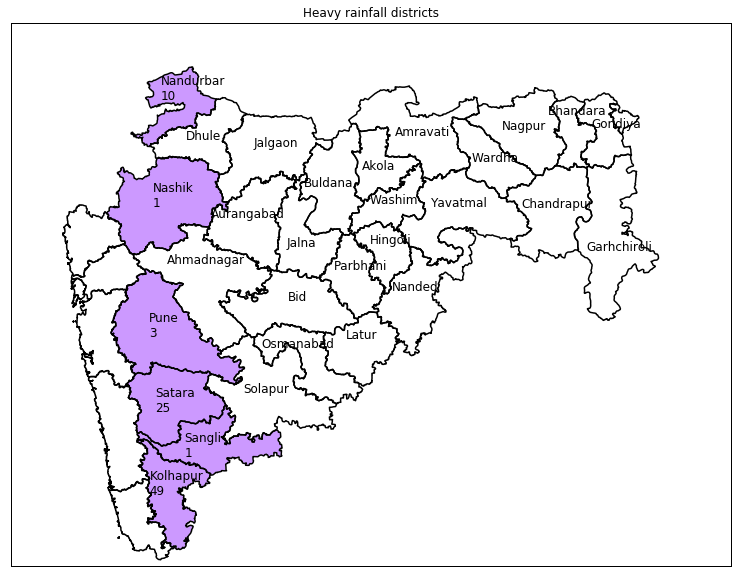

In [39]:
latlon_data = pd.read_csv("/home/shri/Downloads/PROJECT/Time-Series-Forecasting-master/Maharashtra/district_latlon.csv") 
latlon_data = latlon_data.drop(latlon_data.columns[latlon_data.columns.str.contains('unnamed',case = False)],axis = 1)

num_colors = 1
cm = plt.get_cmap('rainbow')
high_rainfall_df = pd.DataFrame({'Count': list(high_rainfall.values())})
high_rainfall_df.index = high_rainfall.keys()
high_rainfall_df['bin'] = 0
#scheme = ['#ff99cc', '#cc99ff', '#ff944d']
scheme = ['#cc99ff']
values = high_rainfall_df.bin
print(high_rainfall_df)

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, frame_on=False)

map = Basemap(projection='lcc',resolution='l', llcrnrlon=72, 
               llcrnrlat=15.5,urcrnrlon=82,urcrnrlat=22.5,lat_0=16,lon_0=75.11)
map.drawmapboundary(fill_color='white')
map.fillcontinents(color='white',lake_color='white')
map.readshapefile('/home/shri/Downloads/PROJECT/Time-Series-Forecasting-master/Maharashtra/gadm36_IND_shp/gadm36_IND_2', 'gadm36_IND_2', drawbounds = False)

patches   = []
facecolor_array = []
for info, shape in zip(map.gadm36_IND_2_info, map.gadm36_IND_2):
    if(info['NAME_1'] == 'Maharashtra'):
        x, y = zip(*shape) 
        map.plot(x, y, marker='', color='black')
        district = info['NAME_2']
        if district not in high_rainfall_df.index:
            color = '#dddddd'
        else:
            color = scheme[high_rainfall_df.ix[district]['bin']]
            patches.append( Polygon(np.array(shape), True))
            facecolor_array.append(color)
    else:
        color = '#dddddd'

ax.add_collection(PatchCollection(patches, facecolor= facecolor_array, edgecolor='w', linewidths=1., zorder=2))
ax.set_title("Heavy rainfall districts")

lat = latlon_data['lat'].tolist()
lon = latlon_data['lon'].tolist()
label_dist = latlon_data['district'].tolist()

X,Y = map(lon,lat)
ax.scatter(X,Y)
for i, (x, y) in enumerate(zip(X, Y), start=0):
    district_name = label_dist[i]
    try:
        ax.annotate(district_name + "\n" + str(high_rainfall_df.ix[district_name].Count), (x,y), xytext=(0,0), textcoords='offset points', fontsize=12, color='black')
    except:
        ax.annotate(district_name + "\n", (x,y), xytext=(0,0), textcoords='offset points', fontsize=12, color='black')
plt.show()